# Neural Networks - Gas Turbines Dataset

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [108]:
gas = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Data Science/Assignment/Assignment - 16/gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA

In [109]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [110]:
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [111]:
gas[gas.duplicated()].shape

(0, 11)

In [112]:
titles = list(gas.columns)
titles

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [113]:
titles[7], titles[8], titles[9], titles[10] = titles[8], titles[9], titles[10], titles[7]
titles

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX', 'TEY']

In [114]:
gas1 = gas[titles]
gas1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [115]:
df = gas1.iloc[:, 0:10]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030
NOX,15039.0,68.190934,10.470586,27.765000,61.303500,66.6010,73.9355,119.8900


In [116]:
df.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000


<AxesSubplot:>

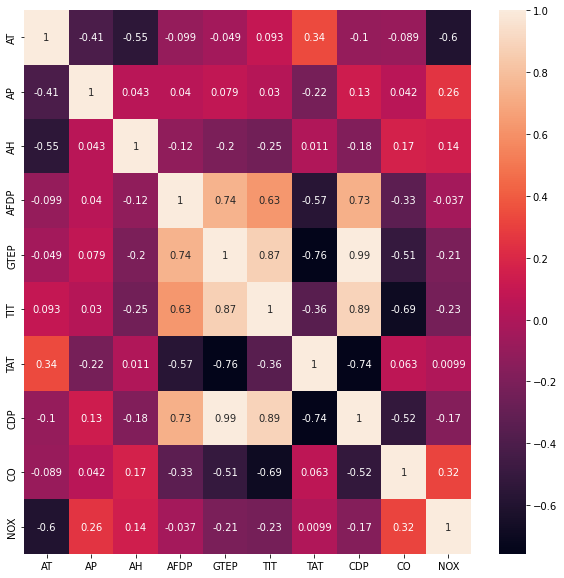

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Normalization and Train & Test Split

In [141]:
x = gas1.iloc[:, 0:10]
y = gas1.iloc[:, 10]

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.33, shuffle=True)

In [143]:
scaler=StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Building model using Neural Networks

In [144]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [160]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [161]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [162]:
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
252/252 [==============================] - 1s 1ms/step - loss: 0.3835 - mae: 0.4567 - val_loss: 0.4606 - val_mae: 0.5207
Epoch 2/100
252/252 [==============================] - 0s 884us/step - loss: 0.3618 - mae: 0.4484 - val_loss: 0.3132 - val_mae: 0.4011
Epoch 3/100
252/252 [==============================] - 0s 900us/step - loss: 0.3335 - mae: 0.4281 - val_loss: 0.3802 - val_mae: 0.4618
Epoch 4/100
252/252 [==============================] - 0s 906us/step - loss: 0.3759 - mae: 0.4526 - val_loss: 0.7410 - val_mae: 0.6602
Epoch 5/100
252/252 [==============================] - 0s 892us/step - loss: 0.3750 - mae: 0.4566 - val_loss: 0.3221 - val_mae: 0.4084
Epoch 6/100
252/252 [==============================] - 0s 963us/step - loss: 0.3169 - mae: 0.4136 - val_loss: 0.2720 - val_mae: 0.3735
Epoch 7/100
252/252 [==============================] - 0s 949us/step - loss: 0.3373 - mae: 0.4281 - val_loss: 0.4289 - val_mae: 0.5127
Epoch 8/100
252/252 [==============================] - 0s

In [163]:
predictions = model.predict(x_test_scaled[:5])
predictions

array([[133.56618],
       [133.93141],
       [133.93625],
       [133.0912 ],
       [103.25139]], dtype=float32)

In [164]:
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[133.56618]
 [133.93141]
 [133.93625]
 [133.0912 ]
 [103.25139]]
Real values are:  4534     133.79
4137     133.81
13916    134.41
10668    132.93
9920     103.64
Name: TEY, dtype: float64
